# Mathematische Beschreibung der Ionenkonzentrationen

## Weswegen wir die Zelle modellieren
Mit unserem Modell wollen wir vorhersagen können, wie unser Kanal die Zelle in ihrem Energiehaushalt beeinflusst. Wir wollen zunächst die verschiedenen Bestandteile der Zelle anhand von theoretischen Überlegungen kombiniert mit Versuchen charakterisieren. Damit wollen wir Voraussagen treffen können, wie sich der Protonengradient an der Zellmembran unter verschiedenen Bedinungen verhält und verändert. 

Das Modell möchten wir verwenden um bei späteren Veruchen vor der Durchführung die Parameter richtig zu wählen und so unsere Experimente mit besseren Erfolgschancen durchzuführen. Auch Versuchsbedingungen, bei denen die Zellen normalerweise nur sehr langam und ineffizient wachsen, können wir so an einzelnen Zellen simulieren.

Hierfür ist es notwendig, dass zwei Aspekte zusammen spielen: Zum einen die theoretische Überlegung über den Aufbau und die Funktionsweise, zum anderen die Validierung mit Messwerten, etwa einer Messung der Veränderung des pH-Werts. So können wir das Modell immer weiter verfeinern und genauer machen, und auch Vereinfachungen die wir anfangs annehmen, besser beschreiben.


## Struktur des Modells
 


Wir betrachten zwei Protonenkonzentrationene: Zum einen die innerhalb der Zelle, zum anderen außerhalb. Wir haben somit zwei "Protonenpools": Einen abgeschlossenen innerhalb der Zelle mit definiertem Volumen ($V_{int}$) und pyhsikalischen Grenzen, und einen Volumen außerhalb ($V_{ext}$). Für das äußere nehmen wir an, dass sich die Protonen über ein Effekivvolumen ausbreiten (etwa dem Volumen, das der Zelle innerhalb der Nährlösung zu Verfügung steht). Wir ordnen also dem Volumen außerhalb eine feste Größe zu, mit der wir die Konzentration berechnen: Die Protonenkonzentrationen $c_{int}(t)$ innerhalb und $c_{ext}(t)$ außerhalb der Zelle. 

Wir vereinfachen das System weiter, indem wir sagen, dass sich die Protonen gleichmäßig über die jeweiligen Volumina verteilen. In Realität wäre dies nicht der Fall, es gäbe beispielsweise elektrostatische Kräfte die besonders an der Zelmembran eine Rolle spielen. Zur genauen Betrachtung muss das System räumlich genauer betrachtet werden und es müssen weitere Ionenbewegungen, etwa Chlor, betrachtet werden. In unserem Modell betrachten wir nur Änderungen der Reaktionsgeschwindigkeit durch eine Änderung der Konzentrationen der betrailigten Stoffe und keine weiteren Kräfte oder Einflussfaktoren. Wir können die Konzentrationsänderung innerhalb bzw. außerhalb der Zelle also berechnen durch: 
$$\frac{\partial c_{int}}{\partial t} = \frac{v}{V_{int}} \qquad \mathrm{und} \qquad \frac{\partial c_{ext}}{\partial t} = - \frac{v}{V_{ext}}$$

Wir wollen also wissen, wie viele Protonen pro Sekunde (angegeben mit einer "Protonengeschwindigkeit" $v$) bei einem bestimmten Gefälle $\delta c = c_{int} - c_{ext}$ über die Membran wandern. Dabei gibt es drei Hauptströme: Den Protonenfluss über die Atmungskette $v_{res}$, den Protonenfluss über die ATP-Synthase $v_{atp}$ und den Protonenfluss über unseren Kanal $v_{ch}$. Hinzu kommt noch eine Basisrate über den Rest der Membran: $v_{mem}$. Die Ströme lassen sich aufaddieren zur einem Gesamtstrom: 
$$ v = \sum_{i \in C} v_i = v_{res} + v_{ATP} + v_{ch} + v_{mem} $$

### Charakteriesierung ATP-Synthase

Die ATP-Synthase lässt sich nach ... modellieren, indem man den Weg eines Protons durch sie in mehrere Teilreaktionen unterteilt. Zunächst wird das Proton auf der Außenseite der Membran im (Name vom Komplex einfügen) aufgenommen: $H^+ + E_1 \rightarrow H^+E_1$ ($E_1$ ist die ATP-Synthase auf der Außenseite der Membran) Mit der Aufnahme des Protons wird das Molekül gedreht: $H^+E_1 \rightarrow H^+E_2$ $E_2$ ist hier die ATP-Synthase nach der Drehung, wir vereinfachen die Rektion in eine einmalige Konformationsänderung anstatt einer Drehung über drei Stufen. Nach der Drehung des Komplexes wird das Proton auf der Innenseite der Membran frei, was die letzte Teilreaktion darstellt: $H^+E_2 \rightarrow H^+ + E_2$.

Für jeden Schritt lässt sich die Reaktionsrate proportional zur jeweiligen Protonenkonzentration beziehungsweise proportional zur Differenz der Konzentrationen beschreiben: 
* Die Rotationsrate auf der Außenseite der Membran: $v_{rot} = k_t(H^+_{out} - H^+_a)$ 
* Und auf der Innenseite: $v_{rot} = k_t(H^+_{in} - H^+_a)$ 
* Sowie im Molekül: $v_{rot} = k_rEH^+_a$ 

Unter Beachtung des Massewirkungsgesetzes lässt sich mit ein wenig Algebra nach ... die Syntheserate nun durch die folgende Gleichung beschreiben: 

$$v_{syn} = V_{max} \frac{H^+_{in}}{H^+_{in} + K'_m }   $$
Mit:
* $K'_m = K_m (1 + \frac{H^+_{out}}{K_I})$
* $V_{max} = k_s K_r E_0$
* $K_m = K_1 + \frac{k_r E_0}{k_t}$
* $K_I = K_2 \left( \frac{1+k_r E_0}{K_1 k_t } \right) $

Die Parametrisierung der Formel erfolgt nach Messungen von .... . In dieser Arbeit wurde der ATP-Durchsatz bei verschiedenen pH-Differenzen gemessen, der elektrische Gradient wurde dabei (wie wir es in unserem Modell ebenfalls vereinfachen) mithilfe eines (Chlorkanals?) auf null festgesetzt. Somit können die folgenden Werte eingesetzt werden:
* ...
* ...
* ...



### Charakteriesierung des Kanals

Für die Modellierung nehmen wir an, dass unser Kanal aus zwei Teilen besteht: Zum einen gibt es auf der Innenseite der Membran verschiedene Proteinkomplexe, die Protonen aufnehmen und zur Mitte des Kanals bringen. Auf der Außenseite der Membran gibt es entsprechend Proteinkomplexe, die das übergebene Proton nehmen, zur Außenseite der Membran leiten und es dort in das Exoplasma übergehen lassen. Die beiden Kanalhälfen sind durch das Molekül Retinal gekoppelt, je nach Konformation ermöglicht es den Übergang von Protonen von der einen zur anderen Hälfte. 

Der Weg des Protons wird nun in mehrere Teilreaktionen aufgeteilt. Zunächst wird es vom Enzym aufgenommen, es bindet sich also mit dem Enzym: $ H^+ + E_1 \leftrightarrow C_1$ $E_1$ die eine Seite des Kanals, $C_1$ beschreibt einen Komplext aus der Seite des Kanals mit gebundenem Proton. 

Danach wird das Proton von der einen Seite des Kanals in die andere übergeben: $C_1 + E_2 \leftrightarrow E_1 + C_2$ $E_2$ ist entsprechend die andere Seite des Kanals und $C_2$ ein Komplex aus der Seite des Kanals mit gebundenem Proton. 

Als letztes wird das Proton auf der anderen Seite des Kanals freigegeben: $C_2 \leftrightarrow E_2 + H^+$

Die Reaktionen sind hier alle als reversibel beschrieben, die Komplexe können Protonen binden aber auch wieder freigeben. Wenn man eine Protonenpumpe betrachtet, etwa Bakteriorhedopsin im Wildtyp, dann muss die zweite Teilreaktion als irreversibel betrachtet werden. Durch die Punktmutation, welche die Pumpe zum Kanal macht, wird die Stelle, an der der Kanal pumpt instabil und Protonen können auch in die andere Richtung hindurch gehen.

#### Herleitung einer Formel zur Beschreibung des Flusses durch den Kanal
Die Gesamtreaktion die abläuft, ist: $H^+_{in} + E_1 \leftrightarrow C_1 \leftrightarrow C_2 \leftrightarrow E_2 + H^+_{out}$ mit den Reaktionsfaktoren $k_1$ u. $k_{-1}$ für die erste, $k_2$ u. $k_{-2}$ für die zweite sowie $k_3$ u. $k_{-3}$ für die dritte Teilreaktion.

Man kann nun die Änderungsraten der einzelnen Teiledukte und Produkte beschreiben: 
$$ \frac{dH^+_{in}}{dt} = -k_1 H^+_{in} E_1 + k_{-1} C_1$$
$$ \frac{dE_1}{dt} = -k_1 H^+_{in} E_1 + k_{-1} C_1$$
$$ \frac{dC_1}{dt} = k_1 H^+_{in} E_1 + k_{-2} C_2 - k_2 C_1$$
$$ \frac{dC_2}{dt} = k_{-3} E_2 H^+_{out} + k_{2} C_1 - k_{-2} C_2 - k_3 C_2$$
$$ \frac{dE_2}{dt} = k_3 C_2 - k_{-3} E_2 H^+_{out}$$
$$ \frac{dH^+_{out}}{dt} = k_3 C_2 - k_{-3} E_2 H^+_{out}$$

Wir wissen, dass die Gesamtmenge an Enzym konstant bleibt: $E_1 + C_1 = E^0_1 + C^0_1$, sowie $E_2 + C_2 = E^0_2 + C^0_2$ Somit können wir in den obrigen Gleichungen $E$ ersetzen: $E_1 = E^0_1 + C^0_1 - C_1$ beziehungsweise $E_2 = E^0_2 + C^0_2 - C_2$
$$ \frac{dC_1}{dt} = k_1 H^+_{in} (E^0_1 + C^0_1 - C_1) + k_{-2} C_2 - k_2 C_1$$
$$ \frac{dC_2}{dt} = k_{-3} (E^0_2 + C^0_2 - C_2) H^+_{out} + k_{2} C_1 - k_{-2} C_2 - k_3 C_2$$

Die obrigen Differentialgleichungen können wir lösen indem mir annehmen, dass sich auf der von uns betrachteten Zeitskala sowohl die Protonenkonzentration $H^+_{out}$ und $H^+_{in}$ als auch die Konzentration an gebundenen Kanal-Protonen-Komplexen nicht ändert. Wir suchen also $C_1$ und $C_2$ sodass gilt: $\frac{dC_1}{dt} = 0$ und $\frac{dC_2}{dt} =0$
$$ 0 = k_1 H^+_{in} (E^0_1 + C^0_1 - C_1) + k_{-2} C_2 - k_2 C_1$$
$$ \Rightarrow C_1 = \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} C_2}{k_1 H^+_{in} + k_2}$$

$$ 0 = k_{-3} E_2 H^+_{out} + k_{2} C_1 - k_{-2} C_2 - k_3 C_2$$
$$ \Rightarrow C_2 = \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2C_1 - k_3 + k_{-3}H^+_{out}}$$

Dies können wir nun einsetzen in die Formel für die Reaktionraten der Protonen:
$$ \frac{dH^+_{out}}{dt} = k_3 C_2 - k_{-3} (E^0_2 + C^0_2 - C_2) H^+_{out}$$
$$ \frac{dH^+_{out}}{dt} = k_3 \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2C_1 - k_3 + k_{-3}H^+_{out}} - k_{-3} (E^0_2 + C^0_2 - \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2C_1 - k_3 + k_{-3}H^+_{out}}) H^+_{out}$$

#### Idee zum Eliminieren: 
Wir betrachten zwei verschiedene Reaktionen für die Änderungsrate innen und außen, mit dem Übergang im Protein jeweils irreversibel:
##### Innen: 
Reaktion: $$H^+_{in} + E_1 \leftrightarrow C_1 \leftarrow C_2 \leftrightarrow E_2 + H^+_{out}$$
$$ \frac{dH^+_{in}}{dt} = -k_1 H^+_{in} E_1 + k_{-1} C_1$$
$$ C_1 = \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} C_2}{k_1 H^+_{in} + k_2}$$
$$ C_2 = \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_3 + k_{-3}H^+_{out}}$$
Bei $C_2$ fehlt der Übergang von $C_1$

$$ \frac{dH^+_{in}}{dt} = -k_1 H^+_{in} (E^0_1 + C^0_1 - C_1) + k_{-1} C_1$$
$$ \frac{dH^+_{in}}{dt} = -k_1 H^+_{in} (E^0_1 + C^0_1 - \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} C_2}{k_1 H^+_{in} + k_2}) + k_{-1} \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} C_2}{k_1 H^+_{in} + k_2}$$
$$ \frac{dH^+_{in}}{dt} = -k_1 H^+_{in} (E^0_1 + C^0_1 - \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_3 + k_{-3}H^+_{out}}}{k_1 H^+_{in} + k_2}) + k_{-1} \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_3 + k_{-3}H^+_{out}}}{k_1 H^+_{in} + k_2}$$

$$ \frac{dH^+_{in}}{dt} = -k_1 H^+_{in} (E^0_1 + C^0_1) + k_1 H^+_{in} \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_3 + k_{-3}H^+_{out}}}{k_1 H^+_{in} + k_2} + k_{-1} \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_3 + k_{-3}H^+_{out}}}{k_1 H^+_{in} + k_2}$$
$$ \frac{dH^+_{in}}{dt} = -k_1 H^+_{in} (E^0_1 + C^0_1) + (k_1 H^+_{in} + k_{-1}) \frac{k_1 H^+_{in}(E^0_1 + C^0_1) + k_{-2} \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_3 + k_{-3}H^+_{out}}}{k_1 H^+_{in} + k_2} $$

Wir nehmen an, dass $E^0_1 = E^0_2 = E^0$ und dass $C^0_1 = C^0_2 = 0$
$$ \frac{dH^+_{in}}{dt} = -k_1 H^+_{in} E^0 + (k_1 H^+_{in} + k_{-1}) \frac{k_1 H^+_{in}E^0 + k_{-2} \frac{k_{-3} H^+_{out} E^0}{k_{-2} - k_3 + k_{-3}H^+_{out}}}{k_1 H^+_{in} + k_2} $$

##### Außen:
Reaktion: $$H^+_{in} + E_1 \leftrightarrow C_1 \rightarrow C_2 \leftrightarrow E_2 + H^+_{out}$$
$$ C_1 = \frac{k_1 H^+_{in}(E^0_1 + C^0_1) }{k_1 H^+_{in} + k_2}$$
$$ C_2 = \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2C_1 - k_3 + k_{-3}H^+_{out}}$$
Bei $C_1$ fehlt der Übergang von $C_2$

$$ \frac{dH^+_{out}}{dt} = k_3 C_2 - k_{-3} E_2 H^+_{out}$$
$$ \frac{dH^+_{out}}{dt} = k_3 \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2C_1 - k_3 + k_{-3}H^+_{out}} - k_{-3} (E^0_2 + C^0_2 - C_2) H^+_{out}$$
$$ \frac{dH^+_{out}}{dt} = k_3 \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2C_1 - k_3 + k_{-3}H^+_{out}} - k_{-3} (E^0_2 + C^0_2 - \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2C_1 - k_3 + k_{-3}H^+_{out}}) H^+_{out}$$

$$ \frac{dH^+_{out}}{dt} = k_3 \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2\frac{k_1 H^+_{in}(E^0_1 + C^0_1) }{k_1 H^+_{in} + k_2} - k_3 + k_{-3}H^+_{out}} - k_{-3} H+_{out}( E^0_2 + C^0_2) - k_{-3} \left( \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2\frac{k_1 H^+_{in}(E^0_1 + C^0_1) }{k_1 H^+_{in} + k_2} - k_3 + k_{-3}H^+_{out}}\right) H^+_{out}$$

$$ \frac{dH^+_{out}}{dt} = (k_3 - k_{-3} H^+_{out}) \frac{k_{-3} H^+_{out} (E^0_2 + C^0_2)}{k_{-2} - k_2\frac{k_1 H^+_{in}(E^0_1 + C^0_1) }{k_1 H^+_{in} + k_2} - k_3 + k_{-3}H^+_{out}} - k_{-3} H^+_{out}( E^0_2 + C^0_2) $$

Wir nehmen an, dass $E^0_1 = E^0_2 = E^0$ und dass $C^0_1 = C^0_2 = 0$
$$ \frac{dH^+_{out}}{dt} = (k_3 - k_{-3} H^+_{out}) \frac{k_{-3} H^+_{out} E^0}{k_{-2} - k_2\frac{k_1 H^+_{in} E^0 }{k_1 H^+_{in} + k_2} - k_3 + k_{-3}H^+_{out}} - k_{-3} H^+_{out} E^0$$

##### Differenz der beiden:
$$ v = \frac{dH^+_{in}}{dt} - \frac{dH^+_{out}}{dt}$$
$$ v = (k_1 H^+_{in} + k_{-1}) \frac{k_1 H^+_{in}E^0 + k_{-2} \frac{k_{-3} H^+_{out} E^0}{k_{-2} - k_3 + k_{-3}H^+_{out}}}{k_1 H^+_{in} + k_2} - (k_3 - k_{-3} H^+_{out}) \frac{k_{-3} H^+_{out} E^0}{k_{-2} - k_2\frac{k_1 H^+_{in} E^0 }{k_1 H^+_{in} + k_2} - k_3 + k_{-3}H^+_{out}} + k_{-3} H^+_{out} E^0 -k_1 H^+_{in} E^0$$




### Charakterisierung der Atmungskette

Bei der Atmungskette wird angenommen, das sie eine feste Anzahl an Protonen bewegt. Wenn sich der Protonengradient über die Membran verändert, so bewegt die Atmungskette vermutlich auch eine etwas andere Anzahl an Protonen, aber wir haben momentan keine Möglichkeit diese Veränderung zu messen. Vereinfacht klibrieren wir die Atmungskette so, dass ohne den Kanal in unserem Modell der in der Natur normalerweise vorliegende pH-Unterschied von ... entsteht. 
$$ V_{res} = n$$

### Alternatives, einfacheres Modell
Ansatz: Es gibt keinen Zwischenzustand auf der Innenseite oder Außenseite der Membran, nur gebunden im Kanal:
$H^+_{out} + E \leftrightarrow C \leftrightarrow H^+_{in} + E$
* $d H^+_{out} = -k_1 H^+_{out} E + k_{-1} C$
* $ d C = -k_{-1} C - k_2 C + k_1 H^+_{out} E + k_{-2} H^+_{in} E$
* $ d H^+_{in} = k_2 C - k_{-2} H^+_{in} E $
* Wir wollen $d H^+_{in}$ wissen
* Quase-steady-state: $d H^+_{out} = konst$, $C = konst$
* $ E_0 = E + C$
* $ d C = 0 = -k_{-1} C - k_2 C + k_1 H^+_{out} E + k_{-2} H^+_{in} E = -k_{-1} C - k_2 C + k_1 H^+_{out} (E_0 - C) + k_{-2} H^+_{in} (E_0 - C)$
* Nach C auflösen um Bedingung für steady-state zu finden:
* $ 0 = (-k_{-1}  - k_2 + k_1 H^+_{out} + k_{-2} H^+_{in}) C + k_1 H^+_{out} E_0 + k_{-2} H^+_{in} E_0$
* $ C = \frac{k_1 H^+_{out} E_0 + k_{-2} H^+_{in} E_0}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2} = \frac{E_0(k_1 H^+_{out} + k_{-2} H^+_{in})}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2}$
* In $d H^+_{in}$ einsetzen:
* $ d H^+_{in} = k_2 C - k_{-2} H^+_{in} (E_0 - C) = (k_2 + k_{-2} H^+_{in})C - k_{-2} H^+_{in} E_0 = (k_2 + k_{-2} H^+_{in})\frac{E_0(k_1 H^+_{out} + k_{-2} H^+_{in})}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2} - k_{-2} H^+_{in} E_0  $
* $ d H^+_{in} = \frac{(k_2 + k_{-2} H^+_{in}) (E_0(k_1 H^+_{out} + k_{-2} H^+_{in}))}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2} - k_{-2} H^+_{in} E_0  $
* $ d H^+_{in} = \frac{(k_2 + k_{-2} H^+_{in}) (E_0(k_1 H^+_{out} + k_{-2} H^+_{in}))}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2} - \frac{(k_{-2} H^+_{in} E_0)(k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2)}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2}$
* $ d H^+_{in} = \frac{(k_2 + k_{-2} H^+_{in}) (E_0(k_1 H^+_{out} + k_{-2} H^+_{in}))}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2} - \frac{(k_{-2} H^+_{in} E_0)(k_1 H^+_{out} + k_{-2} H^+_{in}) - (k_{-1}  + k_2)(k_{-2} H^+_{in} E_0)}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2}$
* $ d H^+_{in} = \frac{((k_2 + k_{-2} H^+_{in}) E_0 - (k_{-2} H^+_{in} E_0))(k_1 H^+_{out} + k_{-2} H^+_{in}) + (k_{-1}  + k_2)(k_{-2} H^+_{in} E_0)}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2} $
* $ d H^+_{in} = \frac{k_2 E_0 (k_1 H^+_{out} + k_{-2} H^+_{in}) + (k_{-1}  + k_2)(k_{-2} H^+_{in} E_0)}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2} $
* $ d H^+_{in} = \frac{ E_0 ( k_1 k_2 H^+_{out} + (2 k_2 k_{-2} + k_{-1} k_{-2})  H^+_{in})}{k_1 H^+_{out} + k_{-2} H^+_{in} -k_{-1}  - k_2} $

### Noch eine Alternative
Nicht die Veränderung der Konzentrationen berechnen, sondern die Rate, die sich von der Innenseite zur Außenseite des Kanals bewegt.

Wieder die gleiche grundlegende Reaktion: $H^+_{out} + E \leftrightarrow C_1 \leftrightarrow C_2 \leftrightarrow H^+_{in} + E$ Uns interessiert also der Übergang $C_1 \rightarrow C_2$ und $C_1 \leftarrow C_2$
* $ v = k_2 C_1 - k_{-2} C_2$


## Implementierung

For implementation, we introduce the spacial "coordinate" $x$ which can take the values 0 or 1 meaning inside (0)or outside (1), respectively. Therefore, c, V and other variables can be used in code as c[0], V[1], ...

In [1]:
import numpy as np
from scipy.integrate import odeint

## Parameter

### Anfangsbedingungen und Auflösung

In [2]:
# Anfangskonzentrationen
ph_in_0 = 7.5
ph_out_0 = 6.0

c_0 = [np.exp(-ph_in_0), np.exp(-ph_out_0), 0]

# Zeitraum und Integrationsschritte
steps = 300
time = 0.1

In [3]:
# Innen- und Außenvolumen
r_cell = 1 #3.0*(10**(-3))
v_out = 1.0 # Volumen, das sehr viel größer als das Zellvolumen ist
V = [(4.0/3.0)*np.pi*(r_cell**3), v_out]

# Proportionalität der Diffusionsrate v
a = 0.8

## Funktionen

### Protonenfluss über die ATP-Synthase
nach innen ist positiv

In [4]:
def v_atp(cout, cin):
        kskrE0 = 57 
        k1k2 = 900
        k1kre0kt = 10**(-5.18)
        v = (kskrE0*(cin/cout)/((cin/cout) + k1k2 + k1kre0kt/cout))
        return v

### Protonenfluss über den Kanal

In [19]:
def v_ch(cout, cin):
    return 0

### Protonenfluss über die Atmungskette

In [20]:
def v_res(cout, cin): 
    return -0.1

### Zusammenführung zum Gesamtfluss und Verrechnung zur Konzentration

In [21]:
def v(c):
    vatp = v_atp(c[1], c[0])
    v =  vatp + v_ch(c[1],c[0]) + v_res(c[1],c[0]) 
    return v

def cdot(c,t):
    vatp = v_atp(c[0], c[1])
    v =  vatp + v_ch(c[1],c[0]) + v_res(c[1],c[0]) 
    dcdt = [v/V[0], -v/V[1], vatp]
    return dcdt

## Integration

### Lösung mit scipy.odeint

In [22]:
#solution = [c_0]
#for n in range(1,steps):
#    t = n * steps
#    solution.append( cdot(solution[-1] * steps, 0 ))

    
    
    

    

t = np.linspace(0, time, steps+1)
solution = odeint(cdot, c_0, t, args=())

## Visualisierung

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

### Zeit-Konzentrations-Diagramm

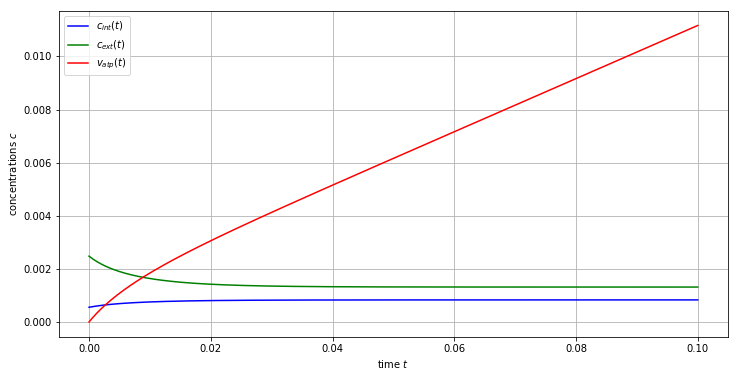

In [24]:
tc, tc_ax = plt.subplots(figsize=(12, 6))
plt.plot(t, solution[:, 0], 'b', label='$c_{int}(t)$')
plt.plot(t, solution[:, 1], 'g', label='$c_{ext}(t)$')
plt.plot(t, solution[:, 2], 'r', label='$v_{atp}(t)$')
plt.legend(loc='best')
plt.xlabel('time $t$')
plt.ylabel('concentrations $c$')
plt.grid()
plt.show()
tc.savefig('./figures/time-conc-diagram.png')

### Räumliche Animation

In [25]:
# Zum Animieren in diesem notebook
%matplotlib notebook
from matplotlib import animation
from matplotlib.animation import FuncAnimation

# Array für Bild definieren
height = 400
width = 400

# half-height
hh = int(height/2)
# maximum concentration
maxconc = max([max([solution[x][0] for x in range(0,len(solution))]), 
               max([solution[x][1] for x in range(0,len(solution))])])

# Array mit Wert 0 initialisieren
image = np.zeros((height, width))
frame = image

<IPython.core.display.Javascript object>


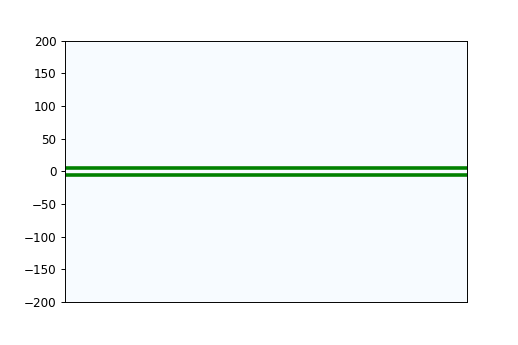

In [12]:
%matplotlib notebook

# Figure und Animation
memanim = plt.figure()

# Membran einzeichnen
quer, mem1, mem2 = [0, width], [-5, -5], [+5, +5]
plt.plot(quer, mem1, quer, mem2, color='green', lw=3, marker = None)

im=plt.imshow(image, interpolation='none', cmap='Blues', vmin=0, vmax=2,
              aspect='auto', extent=[0,width,-hh,hh])
plt.xticks([])

    
# Initialisierungsfunktion: Plottet für jeden Frame den Hintergrund
def init():
    return [image]

# Animationsfunktion: Wird sequenziell vom Animator aufgerufen
def animate(i):
    frame[0 : hh-5, 0 : width] = solution[i][1]/maxconc*1.5+0.5
    frame[hh+5 : height, 0 : width] = solution[i][0]/maxconc*1.5+0.5
    
    im.set_array(frame)
    return [im]

# Animator aufrufen
# blit=True damit nur veränderte Pixel neu gesetzt werden
anima = animation.FuncAnimation(memanim, animate, init_func=init, frames=steps, 
                               interval=int(time/steps*1000), blit=True)

# animation als *.mp4 speichern
#anima.save('./figures/animation_mem_conc.mp4', fps=30, 
#           extra_args=['-vcodec', 'libx264'])

# animation als *.gif speichern
# Unter Windows muss dafür evtl. ImageMagick installiert
# und der convert_path definiert werden, um *.gif s zu speichern
#plt.rcParams['animation.convert_path'] = '<path-to>/magick.exe'

writer = animation.ImageMagickFileWriter()
writer.fps = 30
#anima.save('./figures/animation_mem_conc.gif', writer=writer)

Animationen funktionieren nur beim Ausführen in jupyter notebook, nicht auf Github und nicht im PDF. Die Animation wird aber auch als *.mp4 und als *.gif gespeichert.